<a href="https://colab.research.google.com/github/columose/SQL-BigQuery-/blob/main/Earthquake_records.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Big Query earthquake database**

This dataset was extracted from a public database on BigQuery relating to historically destructed earthquakes. I queried the most damaging earthquakes in history in terms of total deaths and damage in dollars.

```
# Query the highest dead tolls per country due to earthquakes
SELECT country,
  SUM(deaths) as deaths,
  ROUND(SUM(damage_millions_dollars),0) AS damage_millions
FROM `bigquery-public-data.noaa_significant_earthquakes.earthquakes`
GROUP BY country
ORDER BY deaths DESC
LIMIT 10;
```

In [13]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Big Query/Highest destruction per country_25.csv')

In [15]:
df

,country,deaths,damage_millions
0,CHINA,2074897,106527.0
1,IRAN,1083040,10883.0
2,TURKEY,1074769,24625.0
3,SYRIA,439224,NaN
4,ITALY,434863,54460.0
5,JAPAN,415138,180561.0
6,HAITI,323472,8000.0
7,AZERBAIJAN,317219,5.0
8,ARMENIA,191890,16200.0
9,PAKISTAN,148741,6761.0


In [16]:
# Clean dataset. Remove Nans
df_clean = df.dropna(axis = 0)
df_clean.reset_index(drop = True)

# Add ratio column
df_clean.insert(3, 'Ratio', round(df_clean.deaths/df_clean.damage_millions,0))

In [17]:
df_clean

,country,deaths,damage_millions,Ratio
0,CHINA,2074897,106527.0,19.0
1,IRAN,1083040,10883.0,100.0
2,TURKEY,1074769,24625.0,44.0
4,ITALY,434863,54460.0,8.0
5,JAPAN,415138,180561.0,2.0
6,HAITI,323472,8000.0,40.0
7,AZERBAIJAN,317219,5.0,63444.0
8,ARMENIA,191890,16200.0,12.0
9,PAKISTAN,148741,6761.0,22.0
11,ECUADOR,129978,4826.0,27.0


<ipython-input-56-2ae9f4ed5462>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[ivar].set_xticklabels(df_clean.country[:9], rotation = 45)


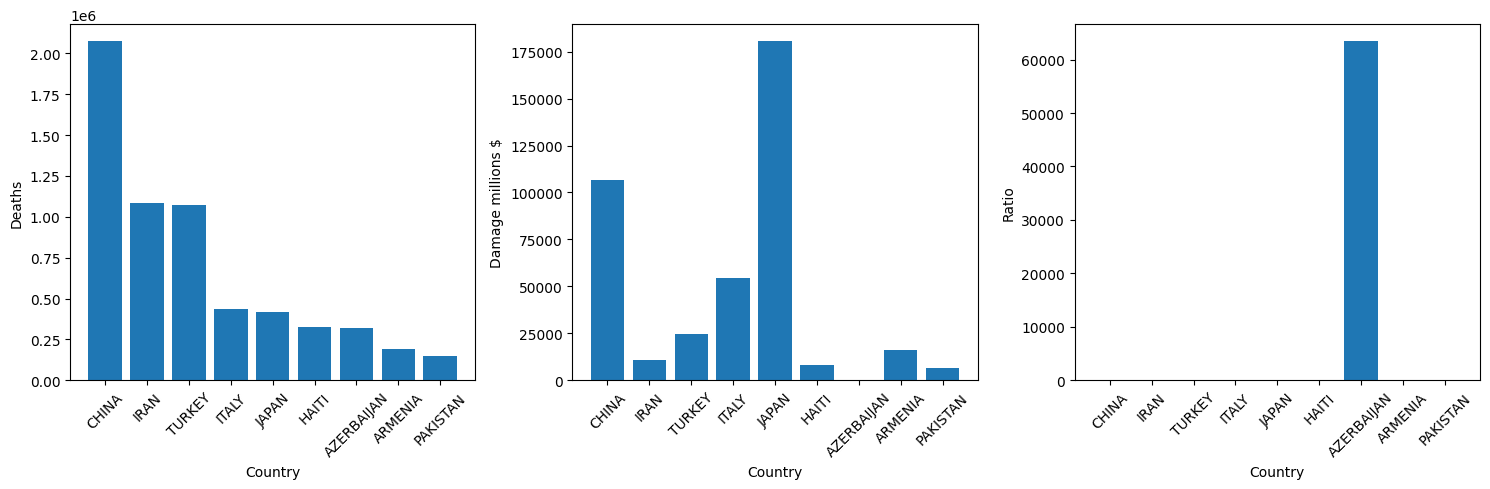

In [56]:
# Visualise damage per country

fig, axs = plt.subplots(1,3, figsize = (15, 5))

ylabels = ['Deaths','Damage millions $','Ratio']

for ivar in range(len(ylabels)):

  axs[ivar].bar(x = df_clean.country[:9], height = df_clean.iloc[:9, ivar + 1]) # because the first column of df provides country names
  axs[ivar].set_ylabel(ylabels[ivar])
  axs[ivar].set_xlabel('Country')
  axs[ivar].set_xticklabels(df_clean.country[:9], rotation = 45)

fig.tight_layout()


# Suspiciously reported damage millions in Azerbaijan

In [19]:
# Test correlation coefficient between variables
from scipy.stats.stats import pearsonr, spearmanr

corr, p = pearsonr(df_clean.deaths, df_clean.damage_millions) # Pearson shows a slightly higher correlation and significance value
rho, pval =spearmanr(df_clean.deaths, df_clean.damage_millions)

print(corr,p)
print(rho,pval)

0.48489178320203596 0.0163268664049335
0.44695652173913036 0.028546284582444417


<ipython-input-19-59ef2f3a55c7>:2: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr, spearmanr
<ipython-input-19-59ef2f3a55c7>:2: DeprecationWarning: Please use `spearmanr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr, spearmanr


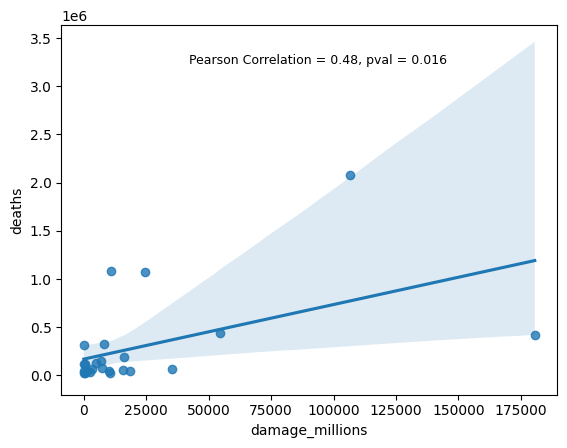

In [20]:
# Plot Pearson results
fig = plt.figure()
sns.regplot(x="damage_millions", y="deaths", data=df_clean)

fig.text(0.325, 0.8 ,f'Pearson Correlation = {round(corr,2)}, pval = {round(p,3)}', fontsize=9) #add text
plt.show()

In [ ]:
# Prepare data for linear regression
X = df_clean['deaths']
y = df_clean['damage_millions']

from sklearn.model_selection import train_test_split

# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=100)

In [ ]:
# check shape of train and test sample
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16,), (8,), (16,), (8,))

In [ ]:
# Choose Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
# Fit model
model.fit(X_train.values.reshape(-1,1),y_train.values)

LinearRegression()

In [ ]:
# Test model on data
y_pred = model.predict(X_test.values.reshape(-1,1))

In [ ]:
# Determine model accuracy
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

print(mean_absolute_error(y_test,y_pred))
print(mean_absolute_percentage_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

12815.936965395005
630.5110620352773
217384053.74059665


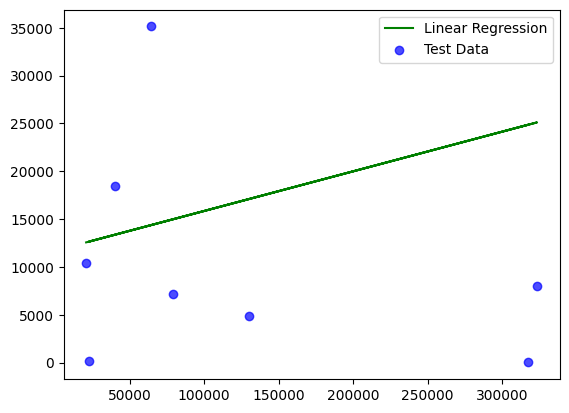

In [ ]:
# Plot test data with regression line from our training data

plt.plot(X_test, y_pred, label = 'Linear Regression', color = 'g')
plt.scatter(X_test, y_test, label = 'Test Data', color = 'b', alpha = 0.7)
plt.legend()
plt.show()